In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as snb
%matplotlib inline

In [209]:
data=pd.read_excel(r'C:\Users\abhay\Documents\NewRepo\Team_B_sameer_abhay\DataAnalysis\OnlineRetail.xlsx')

In [222]:
data['month']=data['InvoiceDate'].dt.month

In [223]:
data['year']=data['InvoiceDate'].dt.year

<AxesSubplot:xlabel='Country'>

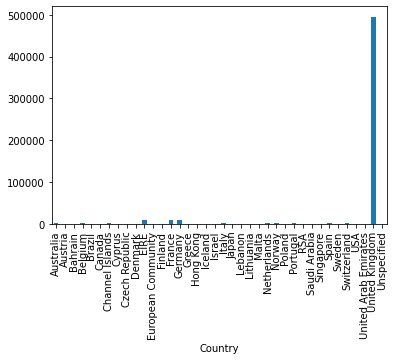

In [257]:
#Customer by countries
data.groupby(['Country']).size().plot(kind='bar')

c:\users\abhay\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

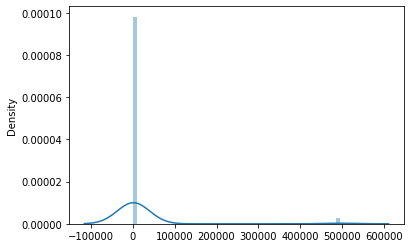

In [258]:
#Distribution plot for customers by countries
s=data.groupby(['Country']).size()
snb.distplot(s)

Customer plot by month

<AxesSubplot:xlabel='month'>

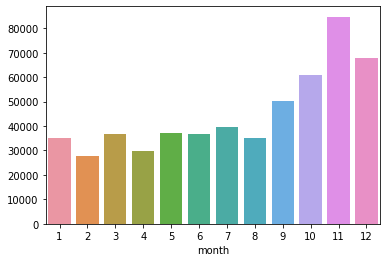

In [259]:
#Customer plot by month
customer_by_month=data.groupby(['month']).size()
snb.barplot(x=customer_by_month.index,y=customer_by_month.values)

Customer plot by year

<AxesSubplot:title={'center':'Customers by year'}, xlabel='year'>

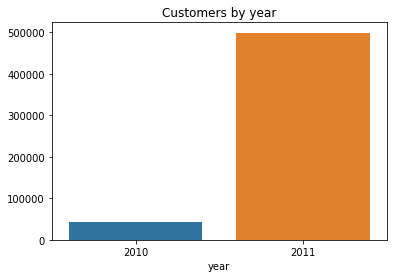

In [260]:
customer_by_year=data.groupby(['year']).size()
plt.title('Customers by year')
snb.barplot(x=customer_by_year.index,y=customer_by_year.values)

Customer by month and year both

In [261]:
customer_by_month_and_year=data.groupby(['month','year']).size()

array([<AxesSubplot:title={'center':'1'}, xlabel='year'>,
       <AxesSubplot:title={'center':'2'}, xlabel='year'>,
       <AxesSubplot:title={'center':'3'}, xlabel='year'>,
       <AxesSubplot:title={'center':'4'}, xlabel='year'>,
       <AxesSubplot:title={'center':'5'}, xlabel='year'>,
       <AxesSubplot:title={'center':'6'}, xlabel='year'>,
       <AxesSubplot:title={'center':'7'}, xlabel='year'>,
       <AxesSubplot:title={'center':'8'}, xlabel='year'>,
       <AxesSubplot:title={'center':'9'}, xlabel='year'>,
       <AxesSubplot:title={'center':'10'}, xlabel='year'>,
       <AxesSubplot:title={'center':'11'}, xlabel='year'>,
       <AxesSubplot:title={'center':'12'}, xlabel='year'>], dtype=object)

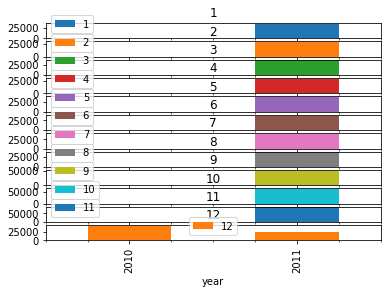

In [262]:
customer_by_month_and_year.unstack(level=0).plot(kind='bar',subplots=True)

In [263]:
#data.groupby(['Country']).size()

In [264]:
#Number of One time buyers
(data['CustomerID'].value_counts()==1).sum()

79

In [292]:
data[(data['CustomerID'].value_counts()==1)]['Country']

<ipython-input-292-4f17aa1b592b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[(data['CustomerID'].value_counts()==1)]['Country']


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

REVENUE DATA ANALYSIS

In [265]:
data['revenue']=data['Quantity']*data['UnitPrice']  #Adding a new Revenue column

In [266]:
#Average Revenue per quarter of the year 2010
data[data['year']==2010]['revenue'].sum()/4

187239.25499999998

<AxesSubplot:>

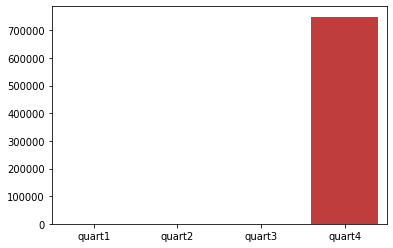

In [267]:
#Reve
rev_year=data[data['year']==2010]
rev_year.groupby('month').sum()
rev_year_qt=dict()
rev_year_qt['quart1']=rev_year[(rev_year['month']<=3)]['revenue'].sum()
rev_year_qt['quart2']=rev_year[(rev_year['month']>3) & (rev_year['month']<=6)]['revenue'].sum()
rev_year_qt['quart3']=rev_year[(rev_year['month']>6) & (rev_year['month']<=9)]['revenue'].sum()
rev_year_qt['quart4']=rev_year[(rev_year['month']>9) & (rev_year['month']<=12)]['revenue'].sum()
rev_per_quarter=pd.Series(data=rev_year_qt)
snb.barplot(x=rev_per_quarter.index,y=rev_per_quarter.values)

<AxesSubplot:>

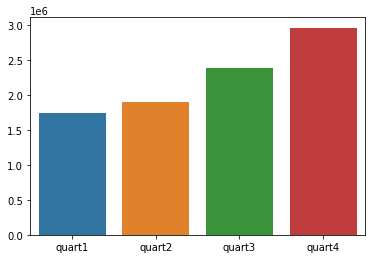

In [268]:
rev_year=data[data['year']==2011]
rev_year.groupby('month').sum()
rev_year_qt=dict()
rev_year_qt['quart1']=rev_year[(rev_year['month']<=3)]['revenue'].sum()
rev_year_qt['quart2']=rev_year[(rev_year['month']>3) & (rev_year['month']<=6)]['revenue'].sum()
rev_year_qt['quart3']=rev_year[(rev_year['month']>6) & (rev_year['month']<=9)]['revenue'].sum()
rev_year_qt['quart4']=rev_year[(rev_year['month']>9) & (rev_year['month']<=12)]['revenue'].sum()
rev_per_quarter=pd.Series(data=rev_year_qt)
snb.barplot(x=rev_per_quarter.index,y=rev_per_quarter.values)

In [269]:
#Highest sales month in UK
uk_sales=data[data['Country'] == 'United Kingdom']
uk_sales
uk_sales.groupby('month').sum()['revenue'].sort_values(ascending=False)[:5]

month
11    1282805.780
12    1065478.050
10     877438.190
9      862018.152
5      596459.860
Name: revenue, dtype: float64

In [270]:
#Least 5 countries by revenue
country_revenue=data.groupby('Country').sum()
least_5_counties_by_revenue=country_revenue['revenue'].sort_values(ascending=True)[:5]
least_5_counties_by_revenue

Country
Saudi Arabia       131.17
Bahrain            548.40
Czech Republic     707.72
RSA               1002.31
Brazil            1143.60
Name: revenue, dtype: float64

In [271]:
#Top 5  countries by revenue
top_5_countries_by_revenue=country_revenue['revenue'].sort_values(ascending=False)[:5]
top_5_countries_by_revenue

Country
United Kingdom    8.187806e+06
Netherlands       2.846615e+05
EIRE              2.632768e+05
Germany           2.216982e+05
France            1.974039e+05
Name: revenue, dtype: float64

In [273]:
#data.head(2)

In [274]:
#Top 10 procucts with maximum revenue
df=data.groupby(['Description']).sum()
df['revenue'].sort_values(ascending=False)[:10]

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: revenue, dtype: float64

In [275]:
#Revenue proportion of each top 10 products
revenue_proportion=(df['revenue'].sort_values(ascending=False)[:10]/sum(df['revenue']))*100
revenue_proportion

Description
DOTCOM POSTAGE                        2.115827
REGENCY CAKESTAND 3 TIER              1.690259
WHITE HANGING HEART T-LIGHT HOLDER    1.022477
PARTY BUNTING                         1.008469
JUMBO BAG RED RETROSPOT               0.947460
RABBIT NIGHT LIGHT                    0.684841
POSTAGE                               0.679446
PAPER CHAIN KIT 50'S CHRISTMAS        0.654427
ASSORTED COLOUR BIRD ORNAMENT         0.604855
CHILLI LIGHTS                         0.551595
Name: revenue, dtype: float64

In [277]:
#data.head(3)